<a href="https://colab.research.google.com/github/dariamm03/Machine_Learning/blob/main/MachineLearning13.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Задание
Обучить модель для определения принадлежности текста к одному из заданных классов. При разборе текста
использовать разбор текста по частям речи. Например, построить модель для определения принадлежности текста определенному автору по части текста.

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

In [ ]:
%pip install -U spacy
%pip install -U spacy-lookups-data
!python -m spacy download ru_core_news_lg

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.6/6.6 MB 17.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 50.1/50.1 kB 6.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 45.0/45.0 kB 5.2 MB/s eta 0:00:00
  Attempting uninstall: spacy
    Found existing installation: spacy 3.6.1
    Uninstalling spacy-3.6.1:
      Successfully uninstalled spacy-3.6.1
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
en-core-web-sm 3.6.0 requires spacy<3.7.0,>=3.6.0, but you have spacy 3.7.2 which is incompatible.
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 98.5/98.5 MB 2.1 MB/s eta 0:00:00
2023-12-15 18:34:25.383785: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2023-12-15 18:34:25.383876: E external/local_xla

In [ ]:
!python -m spacy validate

2023-12-15 18:35:48.300902: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2023-12-15 18:35:48.300967: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2023-12-15 18:35:48.302457: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2023-12-15 18:35:48.311916: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-12-15 18:35:49.625096: W tensorflow/compiler/tf2

In [ ]:
import spacy
import ru_core_news_lg
nlp = spacy.load("ru_core_news_lg")

In [ ]:
df1 = pd.read_csv('esenin-2.csv')
df2 = pd.read_csv('random-2.csv')
df1

,id,poem
0,0,"Есть музыка, стихи и танцы,\r\r\nЕсть ложь и л..."
1,1,"Радость, как плотвица быстрая,\r\r\nЮрко свети..."
2,2,Алый мрак в небесной черни\r\r\nНачертил пожар...
3,3,"Сестре Шуре\r\r\n\r\r\nАх, как мн..."
4,4,"Ах, метель такая, просто черт возьми!\r\r\nЗаб..."
...,...,...
338,338,"Я снова здесь, в семье родной,\r\r\nМой край, ..."
339,339,"Я спросил сегодня у менялы,\r\r\nЧто даёт за п..."
340,340,Я странник убогий.\r\r\nС вечерней звездой\r\r...
341,341,Я усталым таким еще не был\r\r\nВ эту серую мо...


In [ ]:
#получаем лист из частей речи в тексте
df1['new_col'] = df1['poem'].apply(lambda x: nlp(x))
df1['new_col'] = df1['new_col'].apply(lambda x: [token.tag_ for token in x])
#находим количество частей речи в тексте и записываем в колонки
tags = ['ADJ', 'ADP', 'ADV', 'AUX', 'CCONJ', 'DET', 'ENTITY', 'NOUN', 'PART', 'PRON', 'PUNCT', 'SCONJ', 'VERB']
for i in tags:
  df1[i] = df1['new_col'].apply(lambda x: x.count(i))

#доля частей речи в тексте
df1['sum'] = df1.iloc[:, -14:-1].sum(axis = 1)
for i in tags:
  df1[i] = df1[i] / df1['sum']

#Нормализация
for column in tags:
  df1[column] = (df1[column] - df1[column].mean()) / (df1[column].abs().max())

df1['class'] = 1
df1.drop(['sum', 'poem', 'id', 'ENTITY', 'new_col'], axis = 1, inplace = True)

In [ ]:
df2['new_col'] = df2['poem'].apply(lambda x: nlp(x))
df2['new_col'] = df2['new_col'].apply(lambda x: [token.tag_ for token in x])
tags = ['ADJ', 'ADP', 'ADV', 'AUX', 'CCONJ', 'DET', 'ENTITY', 'NOUN', 'PART', 'PRON', 'PUNCT', 'SCONJ', 'VERB']
for i in tags:
  df2[i] = df2['new_col'].apply(lambda x: x.count(i))

df2['sum'] = df2.iloc[:, -14:-1].sum(axis = 1)
for i in tags:
  df2[i] = df2[i] / df2['sum']

#Нормализуем
for column in tags:
  df2[column] = (df2[column] - df2[column].mean()) / (df2[column].abs().max())

df2['class'] = 0
df2.drop(['sum', 'poem', 'id', 'ENTITY', 'new_col'], axis = 1, inplace = True)

<ipython-input-10-77ef12e71f93>:7: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  df2['sum'] = df2.iloc[:, -14:-1].sum(axis = 1)


In [ ]:
df = pd.concat([df1, df2], sort=False)
df

,ADJ,ADP,ADV,AUX,CCONJ,DET,NOUN,PART,PRON,PUNCT,SCONJ,VERB,class
0,-0.056755,0.288357,0.282890,0.142707,0.399334,0.741995,0.350793,0.484828,0.293615,0.407753,0.675427,0.342707,1
1,-0.044803,0.387377,-0.014880,-0.076806,0.525585,-0.206611,0.666261,0.583327,-0.116642,0.353810,0.718579,0.578364,1
2,0.470824,0.326783,-0.208667,-0.076806,0.554048,0.637738,0.675136,-0.185904,0.261898,0.167023,-0.166036,0.180818,1
3,0.017188,0.415696,0.641194,-0.076806,0.391008,-0.036215,0.327129,0.296024,0.657571,0.281020,0.111072,0.416860,1
4,0.347219,0.116722,-0.208667,-0.076806,0.180500,0.736246,0.190521,0.814096,0.435281,0.267501,-0.166036,0.160551,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
495,0.207882,-0.242036,0.059297,-0.078248,-0.084310,0.003128,0.252270,-0.024501,-0.322322,-0.107001,0.129697,0.051489,0
496,-0.023874,0.086810,-0.133208,-0.078248,0.075519,-0.050718,-0.086191,-0.076638,-0.117194,0.017696,0.718159,-0.166460,0
497,-0.124373,-0.045229,-0.034257,-0.078248,-0.069460,0.031477,-0.173898,0.256323,0.163659,0.173963,0.005242,0.100665,0
498,0.271309,0.099630,-0.130042,-0.078248,-0.110041,-0.230205,0.031218,-0.250427,0.098731,0.032611,-0.153636,-0.033724,0


In [ ]:
from sklearn.model_selection import train_test_split
from sklearn import svm
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import precision_score, recall_score, f1_score, roc_auc_score, roc_curve

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(df.drop(['class'], axis=1), df['class'], test_size=0.2, random_state=42)

In [ ]:
classifier = svm.SVC()
classifier.fit(x_train, y_train)
y_pred_svm = classifier.predict(x_test)

pres = precision_score(y_test, y_pred_svm, average='weighted')
recall = recall_score(y_test, y_pred_svm, average='weighted')
f1 = f1_score(y_test, y_pred_svm, average='weighted')
roc_auc = roc_auc_score(y_test,y_pred_svm)

print('precision', pres)
print('recall', recall)
print('f1', f1)
print('roc_auc', roc_auc)

precision 0.8818953998854743
recall 0.8520710059171598
f1 0.844283751403148
roc_auc 0.8214285714285714


In [ ]:
classifier = RandomForestClassifier()
classifier.fit(x_train, y_train)
y_pred_ran = classifier.predict(x_test)

pres = precision_score(y_test, y_pred_ran, average='weighted')
recall = recall_score(y_test, y_pred_ran, average='weighted')
f1 = f1_score(y_test, y_pred_ran, average='weighted')
roc_auc = roc_auc_score(y_test, y_pred_ran)

print('precision', pres)
print('recall', recall)
print('f1', f1)
print('roc_auc', roc_auc)

precision 0.956201957639772
recall 0.9526627218934911
f1 0.9521474293692366
roc_auc 0.9428571428571428


In [ ]:
classifier = GaussianNB()
classifier.fit(x_train, y_train)
y_pred_nb = classifier.predict(x_test)

pres = precision_score(y_test, y_pred_nb, average='weighted')
recall = recall_score(y_test, y_pred_nb, average='weighted')
f1 = f1_score(y_test, y_pred_nb, average='weighted')
roc_auc = roc_auc_score(y_test, y_pred_nb)

print('precision', pres)
print('recall', recall)
print('f1', f1)
print('roc_auc', roc_auc)

precision 0.7316538559830151
recall 0.7218934911242604
f1 0.7053547677645703
roc_auc 0.6852092352092353


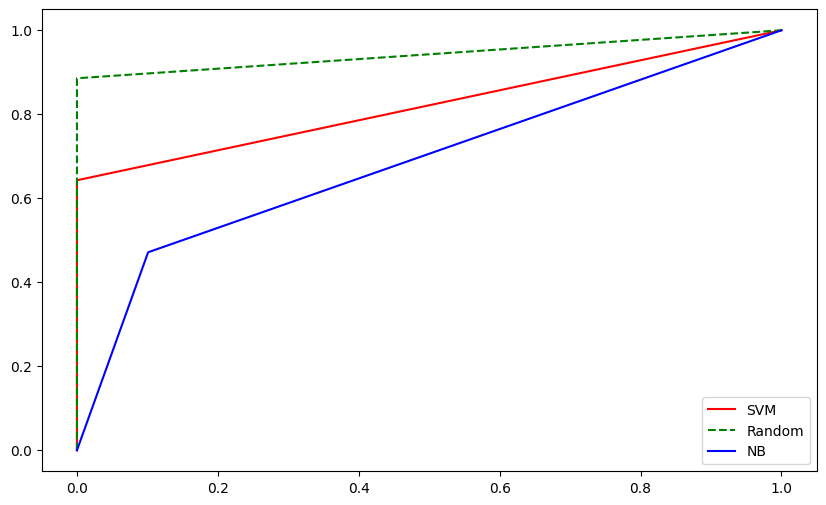

In [ ]:
# Вычисление ROC-кривых
fpr_svm, tpr_svm, _ = roc_curve(y_test, y_pred_svm)
fpr_rand, tpr_rand, _ = roc_curve(y_test, y_pred_ran)
fpr_nb, tpr_nb, _ = roc_curve(y_test, y_pred_nb)


# Визуализировать ROC-кривую
fig, ax = plt.subplots(figsize=(10,6))
ax.plot(fpr_svm, tpr_svm, color='red', linestyle='solid', label='SVM')
ax.plot(fpr_rand, tpr_rand, color='green', linestyle='dashed', label='Random')
ax.plot(fpr_nb, tpr_nb, color='blue', linestyle='solid', label='NB')
ax.legend()